# 필요한 모듈 import

In [125]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [127]:
# 패키지 설치
!pip install kiwipiepy #형태소분석기
!pip install tomotopy #LDA 설계용
import pandas as pd #xlsx파일 불러오기 위한 pandas
import numpy as np
import datetime as dt #날짜 자료형 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import re #정규표현식
import random #랜덤함수
import tomotopy as tp #tomotopy
import collections #counter 호출용
from math import sqrt #제곱근 계산
from tqdm import tqdm
tqdm.pandas() #진행상황 확인
from kiwipiepy import Kiwi #키위
from matplotlib import font_manager, rc #시각화 폰트 패키지
from wordcloud import WordCloud,STOPWORDS #워드클라우드 패키지
from PIL import Image #이미지 배경 패키지

In [128]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs("사과와 바나나 그리고 포도를 좋아합니다"))

['사과', '와', '바나나', '그리고', '포도', '를', '좋아합니다']


# 데이터 불러오기



---

1. 제목 중복의 경우, 가장 높은 조회수를 가진 영상만을 남겨두고 모두 제거.
2. 정규 분포 함수로 집중적으로 업로드가 발생했던 시점만 추출


In [129]:
#news_all=pd.read_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/N번방_네이버뉴스.csv',index_col=0) #저장된 파일 불러오기
#news_all=pd.read_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/N번방 유튜브/N번방_youtube_data_No News.csv',index_col=0)
#news_all=pd.read_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/원숭이두창 유튜브/원숭이두창_youtube_data_No News.csv',index_col=0)
news_all=pd.read_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/원숭이두창_네이버뉴스.csv',index_col=0)
news_all = news_all.rename(columns={'작성날짜': 'Upload Date'})



In [130]:
news_all.reset_index(inplace=True)

In [131]:
news_all

,URL,link,Upload Date,제목,언론사,댓글수
0,https://n.news.naver.com/mnews/article/079/000...,https://n.news.naver.com/mnews/article/079/000...,2022-06-23 05:17:01,현실화된 '원숭이두창' 유입…'지역사회 확산' 얼마나 커질까,노컷뉴스,NaN
1,https://n.news.naver.com/mnews/article/052/000...,https://n.news.naver.com/mnews/article/052/000...,2022-06-23 12:52:21,"""한국도 뚫렸다"" 원숭이두창 초기 증상은 ""목·겨드랑이 통증...""",YTN,13
2,https://n.news.naver.com/mnews/article/076/000...,https://n.news.naver.com/mnews/article/076/000...,2022-07-01 10:05:02,"엑세스바이오 자회사 '웰스바이오', 70분내 검사 원숭이 두창 진단키트 개발",스포츠조선,NaN
3,https://n.news.naver.com/mnews/article/396/000...,https://n.news.naver.com/mnews/article/396/000...,2022-07-01 01:02:02,"국내도 뚫린 ‘원숭이두창’, 어떻게 대처해야 하나",스포츠월드,NaN
4,https://n.news.naver.com/mnews/article/047/000...,https://n.news.naver.com/mnews/article/047/000...,2022-06-27 20:23:01,원숭이두창이 '에이즈 사촌'?... 또 시작된 낙인찍기,오마이뉴스,44
...,...,...,...,...,...,...
2892,https://n.news.naver.com/mnews/article/003/001...,https://n.news.naver.com/mnews/article/003/001...,2022-09-02 04:12:09,벨기에서 원숭이두창 첫 사망 사례 확인…유럽서 3번째,뉴시스,3
2893,https://n.news.naver.com/mnews/article/015/000...,https://n.news.naver.com/mnews/article/015/000...,2022-09-02 18:47:01,美 원숭이두창 감염자 1만8400명…어린이 감염자도 31명,한국경제,2
2894,https://n.news.naver.com/mnews/article/055/000...,https://n.news.naver.com/mnews/article/055/000...,2022-07-05 14:47:19,"원숭이두창 치료제 504명분 9일 도입…""대유행 가능성 아예 없다""",SBS,0
2895,https://n.news.naver.com/mnews/article/011/000...,https://n.news.naver.com/mnews/article/011/000...,2022-08-01 09:03:01,원숭이두창 급증하는 美 뉴욕시 비상사태 선포,서울경제,16




---

유튜브 크롤링 결과에서 같은 제목을 가지고 있지만 조회수가 다른 영상들이 추출됨.
가장 높은 조회수를 가진 영상만을 남겨두고 모두 제거.

In [132]:
# Sort DataFrame by 'Views' in descending order
#df_sorted = news_all.sort_values(by='Views', ascending=False)
#df_sorted = news_all.sort_values(by='Views', ascending=False)
# Drop duplicates based on '제목' while keeping the first occurrence (highest Views)
#news_all = df_sorted.drop_duplicates(subset='제목', keep='first')


In [133]:
#파일 확인
news_all.head()

,URL,link,Upload Date,제목,언론사,댓글수
0,https://n.news.naver.com/mnews/article/079/000...,https://n.news.naver.com/mnews/article/079/000...,2022-06-23 05:17:01,현실화된 '원숭이두창' 유입…'지역사회 확산' 얼마나 커질까,노컷뉴스,NaN
1,https://n.news.naver.com/mnews/article/052/000...,https://n.news.naver.com/mnews/article/052/000...,2022-06-23 12:52:21,"""한국도 뚫렸다"" 원숭이두창 초기 증상은 ""목·겨드랑이 통증...""",YTN,13
2,https://n.news.naver.com/mnews/article/076/000...,https://n.news.naver.com/mnews/article/076/000...,2022-07-01 10:05:02,"엑세스바이오 자회사 '웰스바이오', 70분내 검사 원숭이 두창 진단키트 개발",스포츠조선,NaN
3,https://n.news.naver.com/mnews/article/396/000...,https://n.news.naver.com/mnews/article/396/000...,2022-07-01 01:02:02,"국내도 뚫린 ‘원숭이두창’, 어떻게 대처해야 하나",스포츠월드,NaN
4,https://n.news.naver.com/mnews/article/047/000...,https://n.news.naver.com/mnews/article/047/000...,2022-06-27 20:23:01,원숭이두창이 '에이즈 사촌'?... 또 시작된 낙인찍기,오마이뉴스,44


In [134]:
news_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   URL          2897 non-null   object
 1   link         2897 non-null   object
 2   Upload Date  2897 non-null   object
 3   제목           2897 non-null   object
 4   언론사          2897 non-null   object
 5   댓글수          2851 non-null   object
dtypes: object(6)
memory usage: 135.9+ KB


## 정규분포함수

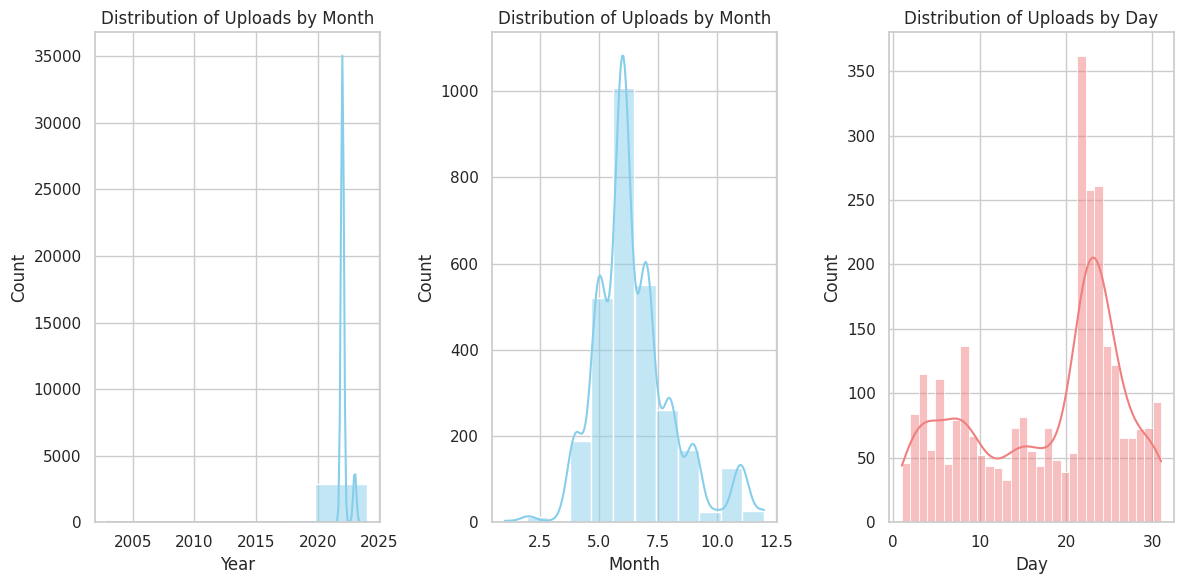

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Your data
data = news_all
# Convert 'Upload Date' to datetime format
#data['Upload Date'] = pd.to_datetime(data['Upload Date'])
# Convert '작성날짜' column to datetime format
data['Upload Date'] = pd.to_datetime(data['Upload Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')



# Create a new column for month and day
#data['Year'] = data['Upload Date'].dt.year
#data['Month'] = data['Upload Date'].dt.month
#data['Day'] = data['Upload Date'].dt.day


data['Year'] = data['Upload Date'].dt.year
data['Month'] = data['Upload Date'].dt.month
data['Day'] = data['Upload Date'].dt.day
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

#연도별

plt.subplot(1, 3, 1)
sns.histplot(data['Year'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Uploads by Month')

# 월별
plt.subplot(1, 3, 2)
sns.histplot(data['Month'], kde=True, bins=12, color='skyblue')
plt.title('Distribution of Uploads by Month')

# 일별
plt.subplot(1, 3, 3)
sns.histplot(data['Day'], kde=True, bins=31, color='lightcoral')
plt.title('Distribution of Uploads by Day')

plt.tight_layout()
plt.show()


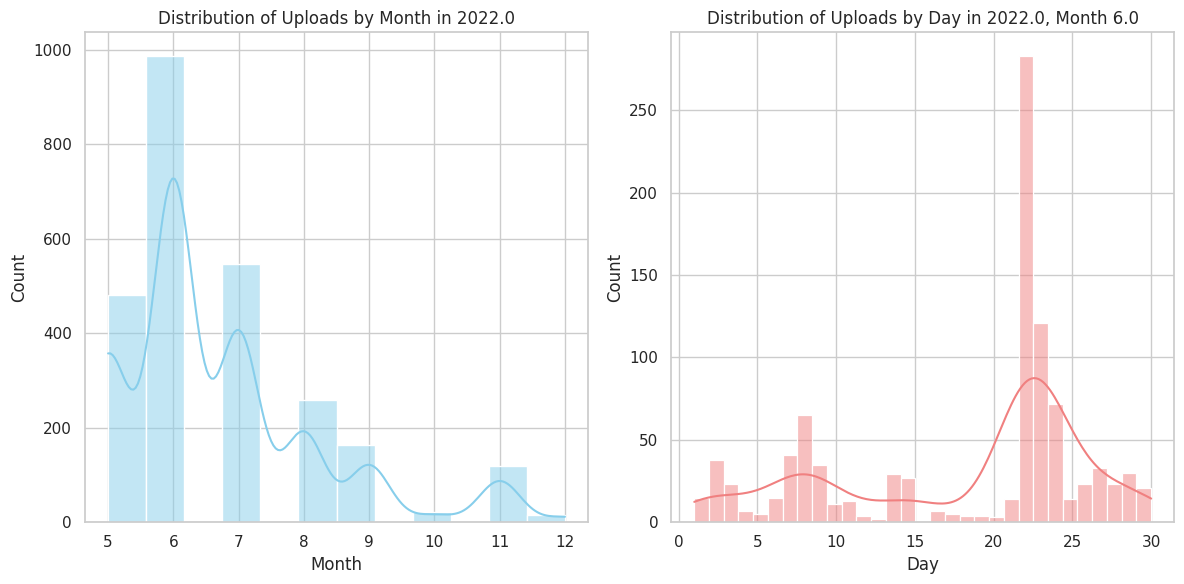

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Your data
data = news_all

# Convert 'Upload Date' to datetime format
data['Upload Date'] = pd.to_datetime(data['Upload Date'])

# Extract year, month, and day
data['Year'] = data['Upload Date'].dt.year
data['Month'] = data['Upload Date'].dt.month
data['Day'] = data['Upload Date'].dt.day

# Find the year with the highest concentration of uploads
most_common_year = data['Year'].mode().iloc[0]

# Filter data for the most common year
most_common_year_data = data[data['Year'] == most_common_year]

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Distribution of uploads by month for the most common year
plt.subplot(1, 2, 1)
sns.histplot(most_common_year_data['Month'], kde=True, bins=12, color='skyblue')
plt.title(f'Distribution of Uploads by Month in {most_common_year}')

# Distribution of uploads by day for the most common year and month
most_common_month = most_common_year_data['Month'].mode().iloc[0]
most_common_month_data = most_common_year_data[most_common_year_data['Month'] == most_common_month]

plt.subplot(1, 2, 2)
sns.histplot(most_common_month_data['Day'], kde=True, bins=31, color='lightcoral')
plt.title(f'Distribution of Uploads by Day in {most_common_year}, Month {most_common_month}')

plt.tight_layout()
plt.show()


In [137]:
print('most_common_year : ', most_common_year)
print('most_common_month : ', most_common_month)

most_common_year :  2022.0
most_common_month :  6.0


## most_common_year 행만 추출

In [138]:
# Convert 'Upload Date' to datetime format
data['Upload Date'] = pd.to_datetime(data['Upload Date'])

# Extract year, month, and day
data['Year'] = data['Upload Date'].dt.year

# Find the year with the highest concentration of uploads
most_common_year = data['Year'].mode().iloc[0]

# Extract rows corresponding to the most common year
#유튜브 n번방
#most_common_year_data = data[(data['Year'] == most_common_year) & ((data['Month'] == 3)|(data['Month'] == 4)|(data['Month'] == 5))]

#유튜브 원숭이두창
most_common_year_data = data[(data['Year'] == most_common_year) & ((data['Month'] == 5)|(data['Month'] == 6)|(data['Month'] == 7))]
#most_common_year_data = data[(data['Year'] == most_common_year) & ((data['Month'] == 5)|(data['Month'] == 6))]
#most_common_year_data = data[(data['Year'] == most_common_year) & ((data['Month'] == 5)|(data['Month'] == 6)|(data['Month'] == 7)|(data['Month'] == 8))]
#most_common_year_data = data[(data['Year'] == most_common_year) & (((data['Month'] == 5)|data['Month'] == 6))]
print(most_common_year_data)

                                                    URL  \
0     https://n.news.naver.com/mnews/article/079/000...   
1     https://n.news.naver.com/mnews/article/052/000...   
2     https://n.news.naver.com/mnews/article/076/000...   
3     https://n.news.naver.com/mnews/article/396/000...   
4     https://n.news.naver.com/mnews/article/047/000...   
...                                                 ...   
2878  https://n.news.naver.com/mnews/article/011/000...   
2880  https://n.news.naver.com/mnews/article/030/000...   
2884  https://n.news.naver.com/mnews/article/654/000...   
2894  https://n.news.naver.com/mnews/article/055/000...   
2896  https://n.news.naver.com/mnews/article/277/000...   

                                                   link         Upload Date  \
0     https://n.news.naver.com/mnews/article/079/000... 2022-06-23 05:17:01   
1     https://n.news.naver.com/mnews/article/052/000... 2022-06-23 12:52:21   
2     https://n.news.naver.com/mnews/article/076/000..

In [139]:
print(most_common_year_data)

                                                    URL  \
0     https://n.news.naver.com/mnews/article/079/000...   
1     https://n.news.naver.com/mnews/article/052/000...   
2     https://n.news.naver.com/mnews/article/076/000...   
3     https://n.news.naver.com/mnews/article/396/000...   
4     https://n.news.naver.com/mnews/article/047/000...   
...                                                 ...   
2878  https://n.news.naver.com/mnews/article/011/000...   
2880  https://n.news.naver.com/mnews/article/030/000...   
2884  https://n.news.naver.com/mnews/article/654/000...   
2894  https://n.news.naver.com/mnews/article/055/000...   
2896  https://n.news.naver.com/mnews/article/277/000...   

                                                   link         Upload Date  \
0     https://n.news.naver.com/mnews/article/079/000... 2022-06-23 05:17:01   
1     https://n.news.naver.com/mnews/article/052/000... 2022-06-23 12:52:21   
2     https://n.news.naver.com/mnews/article/076/000..

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'most_common_year_data'
# with the '댓글수' and 'Upload Date' columns

# Drop rows with NaN values in '댓글수' column
df = most_common_year_data.dropna(subset=['댓글수'])

# Check for non-finite values in '댓글수' column
non_finite_count = ~pd.to_numeric(df['댓글수'], errors='coerce').astype(int).notna().all()

if non_finite_count:
    print("Warning: There are non-finite values in '댓글수' column.")

# Convert '댓글수' column to integer, ignoring errors (coercing non-numeric values to NaN)
df['댓글수'] = pd.to_numeric(df['댓글수'], errors='coerce').astype(int)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(df['Upload Date'], df['댓글수'], color='skyblue')
plt.title('Comment_num for Each Day)')
plt.xlabel('Date')
plt.ylabel('Comment_num')
plt.grid(axis='y')
plt.show()


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
#분석할 데이터 프레임 명을 news_all로 변경
news_all = most_common_year_data

# 전처리

## 명사추출

In [ ]:
#형태소분석기 호출★
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [ ]:
#특수기호 제거
pattern1 = '[-=+,#/\?:;^$.A*"~%!\\\n\r\t<>[]{}()▼▽♣♧§☆♡´∀｀ﾉ♥♡▲△�ㅁ▼▽▶▷◀◁★☆♠♤●○◎⊙◆◇■□＊━▣“”]' #특수기호 목록
news_all['제목']=news_all['제목'].progress_map(lambda x:re.sub(pattern1, ' ', x).strip())  # 특수 기호를 " " 공란으로

100%|██████████| 2015/2015 [00:00<00:00, 289505.11it/s]
<ipython-input-74-caa9287a7c7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['제목']=news_all['제목'].progress_map(lambda x:re.sub(pattern1, ' ', x).strip())  # 특수 기호를 " " 공란으로


In [ ]:
kiwi.analyze('금잔디에 가면 볶음우동을 먹을 수 있어요')

[([Token(form='금잔디', tag='NNP', start=0, len=3),
   Token(form='에', tag='JKB', start=3, len=1),
   Token(form='가', tag='VV', start=5, len=1),
   Token(form='면', tag='EC', start=6, len=1),
   Token(form='볶음', tag='NNG', start=8, len=2),
   Token(form='우동', tag='NNG', start=10, len=2),
   Token(form='을', tag='JKO', start=12, len=1),
   Token(form='먹', tag='VV', start=14, len=1),
   Token(form='을', tag='ETM', start=15, len=1),
   Token(form='수', tag='NNB', start=17, len=1),
   Token(form='있', tag='VA', start=19, len=1),
   Token(form='어요', tag='EF', start=20, len=2)],
  -68.07340240478516)]

In [ ]:
 #명사 추출 함수 (kiwi 0.10.0)
 def get_noun(texts):
    res = kiwi.analyze(texts)[0][0]
    return [Token[0]
            for Token in res
            if Token[1]=='NNG' or Token[1]=='NNP']

#함수 동작 체크
get_noun('금잔디에 가면 볶음우동을 먹을 수 있어요')

['금잔디', '볶음', '우동']

**부가설명**

Kiwi는 List[Tuple[List[Tuple[형태소, 품사태그, 시작위치, 문자열길이]], 분석 점수]] 형태로 분석 결과를 출력합니다.

맨 바깥 리스트에서 res라는 변수를 생성하고(Line 2), 이를 활용하여 품사 태그가 NNG(명사) 혹은 NNP(고유명사)인 형태소만을 리스트 형태로 반환합니다(Line 3~5).

참고로 Kiwi의 품사 태그는 Sejong의 것과 동일합니다.

In [ ]:
# 최초 형태소 분석★
# 전처리 후 다시 형태소분석을 진행할 때도 이 셀을 실행해주세요.
news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))

100%|██████████| 2015/2015 [00:02<00:00, 707.65it/s]
<ipython-input-77-d06654356769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))


In [ ]:
#결과 확인
news_all.head()

,URL,link,Upload Date,제목,언론사,댓글수,Year,Month,Day,nouns
0,https://n.news.naver.com/mnews/article/079/000...,https://n.news.naver.com/mnews/article/079/000...,2022-06-23 05:17:01,현실화된 '원숭이두창' 유입…'지역사회 확산' 얼마나 커질까,노컷뉴스,NaN,2022.0,6.0,23.0,"[현실, 원숭이, 창, 유입, 지역, 사회, 확산]"
1,https://n.news.naver.com/mnews/article/052/000...,https://n.news.naver.com/mnews/article/052/000...,2022-06-23 12:52:21,"""한국도 뚫렸다"" 원숭이두창 초기 증상은 ""목·겨드랑이 통증...""",YTN,13,2022.0,6.0,23.0,"[한국, 원숭이, 창, 초기, 증상, 목, 겨드랑이, 통증]"
2,https://n.news.naver.com/mnews/article/076/000...,https://n.news.naver.com/mnews/article/076/000...,2022-07-01 10:05:02,"엑세스바이오 자회사 '웰스바이오', 70분내 검사 원숭이 두창 진단키트 개발",스포츠조선,NaN,2022.0,7.0,1.0,"[엑세스바이오, 자회사, 웰스바이오, 검사, 원숭이, 창, 진단, 키트, 개발]"
3,https://n.news.naver.com/mnews/article/396/000...,https://n.news.naver.com/mnews/article/396/000...,2022-07-01 01:02:02,"국내도 뚫린 ‘원숭이두창’, 어떻게 대처해야 하나",스포츠월드,NaN,2022.0,7.0,1.0,"[국내, 원숭이, 창, 대처]"
4,https://n.news.naver.com/mnews/article/047/000...,https://n.news.naver.com/mnews/article/047/000...,2022-06-27 20:23:01,원숭이두창이 '에이즈 사촌'?... 또 시작된 낙인찍기,오마이뉴스,44,2022.0,6.0,27.0,"[원숭이, 창, 에이즈, 사촌, 시작]"


In [ ]:
news_all['nouns']

0                       [현실, 원숭이, 창, 유입, 지역, 사회, 확산]
1                  [한국, 원숭이, 창, 초기, 증상, 목, 겨드랑이, 통증]
2       [엑세스바이오, 자회사, 웰스바이오, 검사, 원숭이, 창, 진단, 키트, 개발]
3                                   [국내, 원숭이, 창, 대처]
4                              [원숭이, 창, 에이즈, 사촌, 시작]
                            ...                     
2878                           [원숭이, 창, 지자체, 진단, 검사]
2880            [라씨로, 유럽, 서, 배, 증가, 원숭이, 창, 관련주, 강세]
2884                      [원숭이, 창, 국제, 보건, 비상사태, 선언]
2894                       [원숭이, 창, 치료제, 도입, 유행, 가능]
2896                  [원숭이, 창, 국제, 공중, 보건, 비상사태, 선언]
Name: nouns, Length: 2015, dtype: object



> 전처리 반복


다음 과정을 아주 많이 반복합니다:

1. 일부 아이템을 랜덤하게 추출하여 확인
1.   정규화
2.   커스텀 사전 추가
3.   불용어 제거
4.   다시 형태소분석
















**기사 랜덤 추출**

## 커스텀사전

In [ ]:
#카운터 리셋
counter=0

In [ ]:
i = random.randint(0, len(news_all))


print("article {}".format(i)) #인덱스 번호
print(news_all.iloc[i][['제목','nouns']].values[0]) #기사 본문
print(news_all.iloc[i][['제목','nouns']].values[1]) #생성된 토큰
counter+=1


print('counter:{}'.format(counter))

article 889
원숭이두창 2급 감염병 지정, 격리의무 부여
['원숭이', '창', '급', '감염병', '지정', '격리', '의무', '부여']
counter:1


In [ ]:

#커스텀 사전★
#n번방
word_list=['원숭이두창','CDC','동성애','질병청','WHO','CNN','케이티PD의','사주','심금라이브','심금라이브','점점tv정주행하기','2차피해','생활좌파점','포토라인','서지현','브리핑','연쇄살인마','시사상식','마지막화','문제점','질문','조수빈','02년생','알쓸범잡','박사방','벗방BJ','흑설공주','김원사건파일','랜덤채팅','처벌법','불법합성','민식이법','바지사장','다크웹','10대','여고생','SBS','디지털성범죄물','공소시효',\
           '재개정','미성년','국제단체','박지현','지인능욕','개미귀신','부산여성단체','국회청원','이기야','성착취범','구속영장','운영진','10대','기본권','완장방','무방비','운영자','인권센터','직촬방','내부고발','국제공조수사','BBC','SNS','양형위원장','도용','국내기업','이루다','전원조사','관전자','경남상시혐','속도','국수본부장','의제강간연령','구속영장','신지예','민생당','사이버팀','강제추행','실효성','신상공개','승적','특별조사팀','AI','아동청소년','영화화','성노예화','아동청소년성보호','정승민','자처','재난지원금','범죄단체조직죄','주민번호','구속영장',\
    "산·학",'김유빈','창X들','성착취','IP','박사방','능욕방','제2의','대학생','시민방범대','소통령','협박죄','예비후보','엄중처벌','교사단체','공인요원','신상공개','주거침입강제추행죄','여성의당','통합당',
           '불법촬영물','박사방','신상공개','그루밍','성범죄물','물차별','미성년자','착취범','처벌강화법','무법천지','종족주의','2차','양성희','위장수사','제2','재발','비윤리성','문형욱','무기징역','내주',\
           'n번방','N번방','국민여론','무기징역형','유료회원','아·청','그알','최진성','무죄','국민참여재판','재판','범죄추적극','엘','N번방','국민청원','오덕식',\
           '성착취물','단순소지','디지털성범죄물','방지방법원','국무회의','촬영물','SNS','성평등선대본','임시국회','박사방','조직죄','범죄단체','조주빈','개설자','경찰조사','갓갓',\
           '심바','강력처벌','JMS','처벌촉구','신상공개','디지털성범죄','법정최고형','반일','이우연','양형기준','솜방망이처벌','나체사진','불법촬영물','기자회견','여성후보','상무위원회','동물판']

In [ ]:
# Remove duplicates while preserving the order
unique_word_list = list(dict.fromkeys(word_list))

# Print the result
print(unique_word_list)

['원숭이두창', 'CDC', '동성애', '질병청', 'WHO', 'CNN', '케이티PD의', '사주', '심금라이브', '점점tv정주행하기', '2차피해', '생활좌파점', '포토라인', '서지현', '브리핑', '연쇄살인마', '시사상식', '마지막화', '문제점', '질문', '조수빈', '02년생', '알쓸범잡', '박사방', '벗방BJ', '흑설공주', '김원사건파일', '랜덤채팅', '처벌법', '불법합성', '민식이법', '바지사장', '다크웹', '10대', '여고생', 'SBS', '디지털성범죄물', '공소시효', '재개정', '미성년', '국제단체', '박지현', '지인능욕', '개미귀신', '부산여성단체', '국회청원', '이기야', '성착취범', '구속영장', '운영진', '기본권', '완장방', '무방비', '운영자', '인권센터', '직촬방', '내부고발', '국제공조수사', 'BBC', 'SNS', '양형위원장', '도용', '국내기업', '이루다', '전원조사', '관전자', '경남상시혐', '속도', '국수본부장', '의제강간연령', '신지예', '민생당', '사이버팀', '강제추행', '실효성', '신상공개', '승적', '특별조사팀', 'AI', '아동청소년', '영화화', '성노예화', '아동청소년성보호', '정승민', '자처', '재난지원금', '범죄단체조직죄', '주민번호', '산·학', '김유빈', '창X들', '성착취', 'IP', '능욕방', '제2의', '대학생', '시민방범대', '소통령', '협박죄', '예비후보', '엄중처벌', '교사단체', '공인요원', '주거침입강제추행죄', '여성의당', '통합당', '불법촬영물', '그루밍', '성범죄물', '물차별', '미성년자', '착취범', '처벌강화법', '무법천지', '종족주의', '2차', '양성희', '위장수사', '제2', '재발', '비윤리성', '문형욱', '무기징역', '내주', 'n번방', 'N번방', '국민여론', '무기징역형', '유료회원'

In [ ]:
#커스텀 사전 리스트를 dataframe형태로 변환
custom_dict = pd.DataFrame({"word":unique_word_list})

#품사태그는 고유명사로 지정
custom_dict['morp']="NNP"

#Kiwi는 우선순위를 부여하기 위해 score개념이 존재합니다. 커스텀 단어를 우선 활용하기 위해 score값에 1을 부여.
custom_dict['score']=1

#데이터 확인
custom_dict.head()

,word,morp,score
0,원숭이두창,NNP,1
1,CDC,NNP,1
2,동성애,NNP,1
3,질병청,NNP,1
4,WHO,NNP,1


In [ ]:
#커스텀 사전을 csv로 저장하고 불러옴★
custom_dict.to_csv("/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/custom_dict.txt", index=False, header=False, sep="\t",encoding='UTF-8')

In [ ]:
#kiwi의 load_user_dictionary는 커스텀 사전을 변경할 경우 업데이트된 단어의 수를 반환해 줍니다.
kiwi.load_user_dictionary('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/custom_dict.txt')

156

In [ ]:
# 최초 형태소 분석★
# 전처리 후 다시 형태소분석을 진행할 때도 이 셀을 실행해주세요.
news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))

100%|██████████| 2015/2015 [00:04<00:00, 422.74it/s]
<ipython-input-87-d06654356769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))


## **단어정규화 딕셔너리**

In [ ]:
#카운터 리셋
counter=0

In [ ]:
i = random.randint(0, len(news_all))

print("article {}".format(i)) #인덱스 번호
print(news_all.iloc[i][['제목','nouns']].values[0]) #기사 본문
print(news_all.iloc[i][['제목','nouns']].values[1]) #생성된 토큰
counter+=1
print('counter:{}'.format(counter))

article 1752
"원숭이두창, 이미 지역사회 전파 가능성도…과한 불안 불필요"
['원숭이두창', '지역', '사회', '전파', '가능', '불안', '필요']
counter:1


* 정규화: 동일한 표현을 다르게 쓴 것을 모두 통일해주는 것
영어 약자, 유행병 이름, 사람 이름, 한자 및 영어 표현 등 수작업으로 교체하여 분류 정확도 높이기

In [ ]:
#정규화 딕셔너리 ★
dic_standardization={'ㅁr약':'마약','동성':'동성애','2차':'재발','제2의':'재발','와치맨':'와치',\
                     '육군':'군대','중대':'군대','연예':'연예인','군부대':'군대','신보라':'연예인','유명인':'연예인',\
                     '박보영':'연예인',\
                     '상승':'급등','게이':'동성애','양성애':'동성애','성병':'동성애','소수자':'동성애','동성애자':'동성애',\
                     '북미':'미국',\


    '法':'법원','비디오머그':'방송','X착취':'성착취','마지막화':'방송','영화':'방송','다큐':'방송','넷플릭스':'방송','알쓸범잡':'방송','미성년':'미성년자',\
                     '김원사건파일':'방송','스타':'연예인','엑소':"연예인",'찬열':'연예인','백현':'연예인','유사':'제2','재발':'제2','국민':'국민청원',\
                     '남성':'남자','檢·警':'검·경','성착취범':'성착취','2차피해':'재발','제2의':'재발','붓다':'부따','그알':"방송",\
                     '박사':'박사방','男':'남자','性':'성','代':'대','부대':'군대','육군':'군대','일병':'군대',\
                     '디지털성범죄':'디지털성범죄물','디지털':'디지털성범죄물','성착취물':'성착취','착취물':'성착취','中':'중국','靑':'청와대','文':'문재인','★':'연예인','무기징역형':'무기징역','女':'여자',\
                     '그알':'그것이알고싶다','N번방':'n번방','軍':'군대','檢':'검사','韓':'한국','與':'여당','野':'야당','北':'북한','(脫)':'','(非)':'','(正常)':'','英':'영국','美':'미국'}

In [ ]:
#정규화 딕셔너리를 활용하여 단어 교체★
for old, new in dic_standardization.items():
  print("convert {} into {}.".format (old, new))
  news_all['제목'] = news_all['제목'].progress_map(lambda x:x.replace(old, new))

convert ㅁr약 into 마약.


100%|██████████| 2015/2015 [00:00<00:00, 192302.95it/s]
<ipython-input-91-3c8aafef5074>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['제목'] = news_all['제목'].progress_map(lambda x:x.replace(old, new))


convert 동성 into 동성애.


100%|██████████| 2015/2015 [00:00<00:00, 283789.08it/s]


convert 2차 into 재발.


100%|██████████| 2015/2015 [00:00<00:00, 317642.82it/s]


convert 제2의 into 재발.


100%|██████████| 2015/2015 [00:00<00:00, 392036.49it/s]


convert 와치맨 into 와치.


100%|██████████| 2015/2015 [00:00<00:00, 403471.74it/s]


convert 육군 into 군대.


100%|██████████| 2015/2015 [00:00<00:00, 384352.29it/s]


convert 중대 into 군대.


100%|██████████| 2015/2015 [00:00<00:00, 466085.18it/s]


convert 연예 into 연예인.


100%|██████████| 2015/2015 [00:00<00:00, 325221.17it/s]


convert 군부대 into 군대.


100%|██████████| 2015/2015 [00:00<00:00, 401268.76it/s]


convert 신보라 into 연예인.


100%|██████████| 2015/2015 [00:00<00:00, 408621.70it/s]


convert 유명인 into 연예인.


100%|██████████| 2015/2015 [00:00<00:00, 392418.75it/s]


convert 박보영 into 연예인.


100%|██████████| 2015/2015 [00:00<00:00, 313065.73it/s]


convert 상승 into 급등.


100%|██████████| 2015/2015 [00:00<00:00, 455460.37it/s]


convert 게이 into 동성애.


100%|██████████| 2015/2015 [00:00<00:00, 471388.40it/s]


convert 양성애 into 동성애.


100%|██████████| 2015/2015 [00:00<00:00, 396152.74it/s]


convert 성병 into 동성애.


100%|██████████| 2015/2015 [00:00<00:00, 466265.17it/s]


convert 소수자 into 동성애.


100%|██████████| 2015/2015 [00:00<00:00, 469268.33it/s]


convert 동성애자 into 동성애.


100%|██████████| 2015/2015 [00:00<00:00, 467399.77it/s]


convert 북미 into 미국.


100%|██████████| 2015/2015 [00:00<00:00, 343390.32it/s]


convert 法 into 법원.


100%|██████████| 2015/2015 [00:00<00:00, 316299.50it/s]


convert 비디오머그 into 방송.


100%|██████████| 2015/2015 [00:00<00:00, 465392.21it/s]


convert X착취 into 성착취.


100%|██████████| 2015/2015 [00:00<00:00, 359884.29it/s]


convert 마지막화 into 방송.


100%|██████████| 2015/2015 [00:00<00:00, 469894.50it/s]


convert 영화 into 방송.


100%|██████████| 2015/2015 [00:00<00:00, 457110.85it/s]


convert 다큐 into 방송.


100%|██████████| 2015/2015 [00:00<00:00, 482778.62it/s]


convert 넷플릭스 into 방송.


100%|██████████| 2015/2015 [00:00<00:00, 491196.24it/s]


convert 알쓸범잡 into 방송.


100%|██████████| 2015/2015 [00:00<00:00, 454529.56it/s]


convert 미성년 into 미성년자.


100%|██████████| 2015/2015 [00:00<00:00, 487540.96it/s]


convert 김원사건파일 into 방송.


100%|██████████| 2015/2015 [00:00<00:00, 458922.81it/s]


convert 스타 into 연예인.


100%|██████████| 2015/2015 [00:00<00:00, 457729.77it/s]


convert 엑소 into 연예인.


100%|██████████| 2015/2015 [00:00<00:00, 454578.45it/s]


convert 찬열 into 연예인.


100%|██████████| 2015/2015 [00:00<00:00, 449190.68it/s]


convert 백현 into 연예인.


100%|██████████| 2015/2015 [00:00<00:00, 185364.80it/s]


convert 유사 into 제2.


100%|██████████| 2015/2015 [00:00<00:00, 274507.03it/s]


convert 재발 into 제2.


100%|██████████| 2015/2015 [00:00<00:00, 349279.77it/s]


convert 국민 into 국민청원.


100%|██████████| 2015/2015 [00:00<00:00, 455362.21it/s]


convert 남성 into 남자.


100%|██████████| 2015/2015 [00:00<00:00, 460072.00it/s]


convert 檢·警 into 검·경.


100%|██████████| 2015/2015 [00:00<00:00, 418412.92it/s]


convert 성착취범 into 성착취.


100%|██████████| 2015/2015 [00:00<00:00, 412410.22it/s]


convert 2차피해 into 재발.


100%|██████████| 2015/2015 [00:00<00:00, 244447.35it/s]


convert 붓다 into 부따.


100%|██████████| 2015/2015 [00:00<00:00, 256939.85it/s]


convert 그알 into 그것이알고싶다.


100%|██████████| 2015/2015 [00:00<00:00, 203264.21it/s]


convert 박사 into 박사방.


100%|██████████| 2015/2015 [00:00<00:00, 389237.90it/s]


convert 男 into 남자.


100%|██████████| 2015/2015 [00:00<00:00, 385298.50it/s]


convert 性 into 성.


100%|██████████| 2015/2015 [00:00<00:00, 433767.32it/s]


convert 代 into 대.


100%|██████████| 2015/2015 [00:00<00:00, 376997.17it/s]


convert 부대 into 군대.


100%|██████████| 2015/2015 [00:00<00:00, 248252.92it/s]


convert 일병 into 군대.


100%|██████████| 2015/2015 [00:00<00:00, 387471.23it/s]


convert 디지털성범죄 into 디지털성범죄물.


100%|██████████| 2015/2015 [00:00<00:00, 415982.80it/s]


convert 디지털 into 디지털성범죄물.


100%|██████████| 2015/2015 [00:00<00:00, 203308.22it/s]


convert 성착취물 into 성착취.


100%|██████████| 2015/2015 [00:00<00:00, 393735.04it/s]


convert 착취물 into 성착취.


100%|██████████| 2015/2015 [00:00<00:00, 462818.17it/s]


convert 中 into 중국.


100%|██████████| 2015/2015 [00:00<00:00, 422048.57it/s]


convert 靑 into 청와대.


100%|██████████| 2015/2015 [00:00<00:00, 399259.38it/s]


convert 文 into 문재인.


100%|██████████| 2015/2015 [00:00<00:00, 387204.96it/s]


convert ★ into 연예인.


100%|██████████| 2015/2015 [00:00<00:00, 225470.14it/s]


convert 무기징역형 into 무기징역.


100%|██████████| 2015/2015 [00:00<00:00, 391020.75it/s]


convert 女 into 여자.


100%|██████████| 2015/2015 [00:00<00:00, 404282.35it/s]


convert N번방 into n번방.


100%|██████████| 2015/2015 [00:00<00:00, 400964.16it/s]


convert 軍 into 군대.


100%|██████████| 2015/2015 [00:00<00:00, 452485.41it/s]


convert 檢 into 검사.


100%|██████████| 2015/2015 [00:00<00:00, 400470.17it/s]


convert 韓 into 한국.


100%|██████████| 2015/2015 [00:00<00:00, 403587.34it/s]


convert 與 into 여당.


100%|██████████| 2015/2015 [00:00<00:00, 262902.37it/s]


convert 野 into 야당.


100%|██████████| 2015/2015 [00:00<00:00, 185072.54it/s]


convert 北 into 북한.


100%|██████████| 2015/2015 [00:00<00:00, 444069.07it/s]


convert (脫) into .


100%|██████████| 2015/2015 [00:00<00:00, 409195.44it/s]


convert (非) into .


100%|██████████| 2015/2015 [00:00<00:00, 458623.97it/s]


convert (正常) into .


100%|██████████| 2015/2015 [00:00<00:00, 456247.17it/s]


convert 英 into 영국.


100%|██████████| 2015/2015 [00:00<00:00, 461655.24it/s]


convert 美 into 미국.


100%|██████████| 2015/2015 [00:00<00:00, 419680.33it/s]


## **불용어 제거**


---


불용어는 분석에 사용되지 않을 단어를 의미합니다. 다음 유형의 단어를 제거하였습니다:

1. 자연어처리 시 통용되는 불용어 리스트
2. 너무 많이 등장하는 단어들 - 모든 문서에서 공통적으로 등장하여 분류 성능을 낮출 우려가 있음.
한 단어로 된 단어
3. 토픽 특성상 핵심 주제어인 '원전' '원자력발전'도 제거하는 게 좋음

In [ ]:
#1차 필터링: 한국어 불용어 사전 활용★
stop_list1 = open('/content/drive/MyDrive/2023 겨울계절 URP/코드/재희/토픽모델링/stopword.txt', encoding = 'utf-8')


lines1 = stop_list1.readlines() #한 줄마다 읽어옴


stopwords = [] #불용어 리스트
for line in lines1:
    a= line.split() #줄 단위 분할
    stopwords.append(a) #한 줄마다 불용어 리스트에 추가


In [ ]:
i = random.randint(0, len(news_all))

print("article {}".format(i)) #인덱스 번호
print(news_all.iloc[i][['제목','nouns']].values[0]) #기사 본문
print(news_all.iloc[i][['제목','nouns']].values[1]) #생성된 토큰
counter+=1
print('counter:{}'.format(counter))

article 157
원숭이두창 '검역구멍' 논란 확산..."허위신고엔 속수무책"
['원숭이두창', '검역', '구멍', '논란', '확산', '허위', '신고', '속수무책']
counter:2


In [ ]:
#2차 필터링: 커스텀 불용어 리스트★
custom_stopwords = ['원숭이','범죄','결정','N번방','박사','검찰','아동','경찰','방지','필요','성착취','여성','성착취물',\
                    '성폭력','n번방','갓갓','텔레그램','박사방','조주빈','처벌','청원',\
                    '노터스','논란','성범죄','케이티PD의','심금라이브','신상','공개','점점tv정주행하기','생활좌파점','포토라인',\
                    '심금라이브','박광온','세계타임즈TV','특별생방송','반도체','셀트리온','켐온','LG전자',\
                    '매일경제TV','에스피시스템스','위메이드맥스','지투파워','티플랙스','나노젠',\
                    '에이프로젠','오상자이엘','큐로컴','우주','아남전자','두산에너빌리티','엠폭스','엑세스바이오',\
                    '가온칩스','아미노로직스','네온테크','인베스트먼트' ,\
                    '뉴스큐','일양약품우','녹십자홀딩스','차백신연구소','진매트릭스','동구바이오','해병개미','녹십자엠에스',\
                    '휴마시스', '수젠텍', '예상', '하락','우주항공', '현대차','진원생명과학', '단타' ,\
                    '글로벌','나우','크랩','씨젠','현대','신풍제약','미코바이오메드','파미셀','엠에스','SK바이오사이언스',\
                    '에너지', '에이스토리', '더블', '바른', '경제', '라이브','한국콜마홀딩스','애플카','의학한림원',\
                    '대봉엘에스','승일','과기한림원','어닝서프라이즈','에이스토리','한국비엔씨','톡톡','강희성', '바이오','HK이노엔','블루베리NFT',\
                    '메가트렌드','현장','공유','중심','시선','무플방지','취재','사건','강력','사설','브리핑','오디오래빗','양성희','취중','이동',\
                    '정면','승부','논설위원','확대경','한마당','마당','통과','밑줄','처리','가능','심층','현장','연결','인터뷰','속보','이데일리',\
                    '대상','발언','관련','영상','황출새','타임라인','착취','뉴스','김지윤', '이브닝쇼',\
                    '핫클릭','보도자료','뉴스하이킥','종합','사사건건','영상','지금','단독','이번','뉴구세요',\
                    '포토','오늘','물','뉴스큐','이슈와치','단독','초점','이슈','관련','한국','이날','발생','이후','이번',\
                    '오후','오전','가운데','기자','사진','최근','정부','나이트포커스','정승민','박주민']
stopwords+=custom_stopwords #커스텀 불용어를 리스트에 추가

In [ ]:
#'불용어 리스트에 없는'형태소만 남기는 방식으로 불용어 제거★
news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if w not in stopwords])

100%|██████████| 2015/2015 [00:00<00:00, 5837.14it/s]
<ipython-input-95-0724f6fa9bb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if w not in stopwords])


In [ ]:
#3차 필터링: 한 글자 제거★
news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if len(w) > 1])

100%|██████████| 2015/2015 [00:00<00:00, 154081.47it/s]
<ipython-input-96-128724ea1ca8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if len(w) > 1])


In [ ]:
#print(news_all.iloc[3502][['제목','nouns']].values[1]) #기사 본문

In [ ]:
#단어 빈도 파악
nouncounter=news_all['nouns'].sum() #형태소 목록 병합
counts = collections.Counter(nouncounter) #병합된 목록 카운트
print(counts) #결과

Counter({'원숭이두창': 1821, '백신': 294, '국내': 251, '확산': 246, '감염': 207, '확진자': 193, 'WHO': 176, '의심': 158, '코로나': 157, '격리': 154, '미국': 139, '확진': 136, '환자': 121, '접촉': 116, '접종': 115, '증상': 110, '동성애': 106, '비상사태': 97, '방역': 91, '비상': 89, '유럽': 88, '보건': 79, '감염병': 78, '검사': 75, '전파': 75, '도입': 73, '세계': 72, '우려': 71, '사례': 69, '검토': 69, '남자': 68, '확인': 68, '당국': 67, '유입': 66, '지정': 62, '위험': 59, '영국': 58, '입국': 57, '치료제': 57, '사태': 57, '선포': 57, '선언': 57, '진단': 53, '강화': 52, '유행': 49, '위기': 49, '치료': 48, '추가': 48, '대응': 47, '천연두': 46, '질병청': 44, '검역': 42, '감염자': 42, '세대': 42, '독일': 42, '치명': 40, '아프리카': 40, '신고': 40, '경보': 38, '공포': 37, '국제': 35, '주의': 35, '공기': 34, '감시': 34, '해외': 33, '발진': 31, '예방': 31, '퇴원': 31, '법정': 31, '잠복기': 30, '공중': 30, '입국자': 30, '전문가': 29, '팬데믹': 29, '회의': 29, '특징': 29, '내국인': 29, '지역': 28, '긴급': 28, '권고': 27, '사용': 27, '전염': 25, '격상': 25, '국서': 25, '제2': 24, '수두': 24, '체계': 24, '확대': 24, '보고': 23, '억제': 23, '상태': 23, '관리': 22, '사망자': 22, '진행': 22, '키트': 21, '

In [ ]:
news_all['nouns']

0         [현실, 원숭이두창, 유입, 지역, 사회, 확산]
1           [원숭이두창, 초기, 증상, 겨드랑이, 통증]
2        [자회사, 웰스바이오, 검사, 진단, 키트, 개발]
3                     [국내, 원숭이두창, 대처]
4                [원숭이두창, 에이즈, 사촌, 시작]
                    ...              
2878             [원숭이두창, 지자체, 진단, 검사]
2880    [라씨로, 유럽, 증가, 원숭이두창, 관련주, 강세]
2884          [WHO, 국제, 보건, 비상사태, 선언]
2894             [원숭이두창, 치료제, 도입, 유행]
2896      [WHO, 국제, 공중, 보건, 비상사태, 선언]
Name: nouns, Length: 2015, dtype: object

In [ ]:
processed_data=[]
df=news_all

# Iterate through the DataFrame
for index, row in df.iterrows():
    nouns_list = row['nouns']
    processed_data.append(nouns_list)


In [ ]:
processed_data

[['현실', '원숭이두창', '유입', '지역', '사회', '확산'],
 ['원숭이두창', '초기', '증상', '겨드랑이', '통증'],
 ['자회사', '웰스바이오', '검사', '진단', '키트', '개발'],
 ['국내', '원숭이두창', '대처'],
 ['원숭이두창', '에이즈', '사촌', '시작'],
 ['원숭이두창', '혐오', '주의보', '동성애', '낙인', '우려'],
 ['미국', '원숭이두창', '마스크', '착용', '권고', '삭제', '공기', '전파'],
 ['포켓', '원숭이두창', '확진', '코로나', '격리'],
 ['발진', '확진', '원숭이두창', '코로나', '관리'],
 ['원숭이두창', '코로나', '전파력', '…팬데믹'],
 ['원숭이두창', '확산', '세계', '긴장', '동성애'],
 ['원숭이두창', '국내', '유입', '전문가', '판단'],
 ['무증상', '잠복기', '입국', '원숭이두창', '국내', '카운트다운'],
 ['동두천시', '코로나', '역학', '조사관', '임명'],
 ['광범위', '확산', '원숭이두창', '팬데믹'],
 ['상륙', '특이', '증상', '보고', '우려'],
 ['원숭이두창', '잠복기', '최장', '전문가', '유행'],
 ['원숭이두창', '의심', '증상', '검역', '백신', '치료', '도입'],
 ['확진자', '치명', '정도'],
 ['원숭이두창', '의심', '환자', '정보'],
 ['아프리카', '풍토병', '원숭이두창', '대륙'],
 ['남자', '원숭이두창', '공포', '가짜', '급속', '확산'],
 ['의사', '원숭이두창', '증상', '대처', '원숭이두창'],
 ['원숭이두창', '세계', '확진', '코로나', '바이러스', '공포'],
 ['온몸', '발진', '원숭이두창', '확산', 'WHO', '긴급', '회의', '소집'],
 ['브라질', '원숭이두창', '확산', '대응', '센터', '가동'

# LDA



```
# processed_data=[['스위트', '새벽', '시간'],
 ['스위트', '송강'],
 ['스위트', '스위트', '나용'],
 ['스위트'],
 ['스위트'],
 ['앞자리', ...
```



##필요한 모듈 import



In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)




##모델링


* 📌 num_topics: 생성될 토픽의 개수
* 📌 chunksize: 한번의 트레이닝에 처리될 문서의 개수
* 📌 passes: 전체 코퍼스 트레이닝 횟수
* 📌 interations: 문서 당 반복 횟수

`class gensim.models.ldamodel.LdaModel(corpus=None, num_topics=100, id2word=None, distributed=False, chunksize=2000, passes=1, update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, minimum_probability=0.01, random_state=None, ns_conf=None, minimum_phi_value=0.01, per_word_topics=False, callbacks=None, dtype=<class 'numpy.float32'>)`

물론 이 파라미터를 다른 숫자로 여러번 해서 가장 정확도 높은 모델을 선택하는 것이 가장 좋습니다. 모델의 정확도는 토픽의 일관성으로도 볼 수 있을텐데, 토픽의 일관성은 Coherence를 보면 됩니다. 파라미터 eval_every=1로 설정하여, 매 pass마다 문서의 Convergence 평가하고, 대부분의 문서가 포함되는 pass를 선정할 수도 있습니다.

Number of unique tokens: 190
Number of documents: 2015


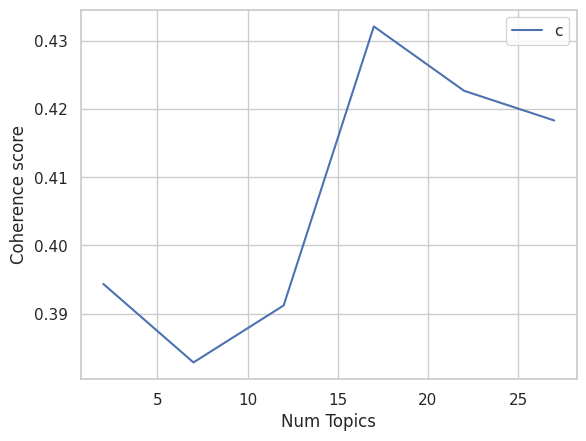

In [ ]:
# -*- coding: utf-8 -*-
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 30;
    start = 2;
    step = 5;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

if __name__ == '__main__':
    #processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/tokenized_data.csv', 'r', encoding='utf-8').readlines())]

    # 정수 인코딩과 빈도수 생성
    dictionary = corpora.Dictionary(processed_data)

    # 출현빈도가 적거나 자주 등장하는 단어는 제거
    # no_below: 적어도 n개 이상의 문서에서 등장해야함
    # no_above: n% 이상의 문서에서 등장하면 배제함.

    dictionary.filter_extremes(no_below=10, no_above=0.3)
    corpus = [dictionary.doc2bow(text) for text in processed_data]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    # 최적의 토픽 수 찾기
    find_optimal_number_of_topics(dictionary, corpus, processed_data)


In [ ]:

from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


if __name__ == '__main__':
    #processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/tokenized_data.csv', 'r', encoding='utf-8').readlines())]

    # 정수 인코딩과 빈도수 생성
    dictionary = corpora.Dictionary(processed_data)

    # 출현빈도가 적거나 자주 등장하는 단어는 제거
    dictionary.filter_extremes(no_below=10, no_above=0.3)
    corpus = [dictionary.doc2bow(text) for text in processed_data]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    # 최적의 토픽 수 찾기 => 14개로 나옴
    # find_optimal_number_of_topics(dictionary, corpus, processed_data)
    # exit()

    perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
    coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

    lda_model = LdaModel(corpus, id2word=dictionary, num_topics=17, passes=30, callbacks=[coherence_logger, perplexity_logger])

    topics = lda_model.print_topics(num_topics=17, num_words=10) #단어 개수 선정

    topic_dict = {}
    for topic in topics:
      topic_num, topic_words = topic
      words_proba = [word.split("*") for word in topic_words.split(" + ")]
      # 비율이 가장 높은 단어를 토픽으로 선정
      max_proba_word = max(words_proba, key=lambda x: float(x[0]))[1].replace('"', '')
      topic_dict[topic_num] = max_proba_word

    print(topic_dict)
    # 각 문서에 대한 토픽 할당
   #doc_topic_assignments = []
    #for doc_bow in corpus:
    #    topic_distribution = lda_model.get_document_topics(doc_bow)
    #    assigned_topic = max(topic_distribution, key=lambda x: x[1])[0]  # 가장 확률이 높은 토픽 선택
    #    doc_topic_assignments.append(assigned_topic)

    # 토픽 할당 값을 DataFrame에 추가
    #df['토픽_할당'] = doc_topic_assignments




    # Compute Coherence Score using c_v
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score (c_v): ', coherence_lda)


Number of unique tokens: 190
Number of documents: 2015
{0: '접촉', 1: '진단', 2: '백신', 3: '도입', 4: '코로나', 5: '유행', 6: '비상사태', 7: '의심', 8: '국내', 9: '유럽', 10: '동성애', 11: '확산', 12: '감염병', 13: '방역', 14: '미국', 15: '격리', 16: '비상'}

Coherence Score (c_v):  0.43356091965732046


In [ ]:
len(topic_dict)

21

In [ ]:
for i, topic_list in enumerate(lda_model[corpus]):
    if i==5: #일단 5개만 확인
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.01190498), (1, 0.01190498), (2, 0.01190498), (3, 0.01190498), (4, 0.01190498), (5, 0.01190498), (6, 0.01190498), (7, 0.01190498), (8, 0.26190683), (9, 0.01190498), (10, 0.26190883), (11, 0.01190498), (12, 0.01190498), (13, 0.01190498), (14, 0.01190498), (15, 0.01190498), (16, 0.01190498), (17, 0.01190498), (18, 0.01190498), (19, 0.01190498), (20, 0.26189473)]
1 번째 문서의 topic 비율은 [(0, 0.02380961), (1, 0.02380961), (2, 0.02380961), (3, 0.02380961), (4, 0.02380961), (5, 0.02380961), (6, 0.02380961), (7, 0.02380961), (8, 0.02380961), (9, 0.02380961), (10, 0.02380961), (11, 0.02380961), (12, 0.52380776), (13, 0.02380961), (14, 0.02380961), (15, 0.02380961), (16, 0.02380961), (17, 0.02380961), (18, 0.02380961), (19, 0.02380961), (20, 0.02380961)]
2 번째 문서의 topic 비율은 [(1, 0.47933543), (5, 0.33971196)]
3 번째 문서의 topic 비율은 [(0, 0.04761905), (1, 0.04761905), (2, 0.04761905), (3, 0.04761905), (4, 0.04761905), (5, 0.04761905), (6, 0.04761905), (7, 0.04761905), (8, 0.04761905

## LDA모델 결과 df로 저장

In [ ]:
issue='원숭이두창'
#issue = 'N번방'


In [ ]:
# DataFrame 생성
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
df_results = pd.DataFrame(columns=['토픽 번호', '대표 단어', '대표 단어 확률','튜플 리스트'])

# DataFrame에 데이터 추가
for doc_num, topic_list in enumerate(lda_model[corpus]):
    if doc_num==1:
      break
    for topic_id, weight in topic_list:
        rep_word, word_prob = lda_model.show_topic(topic_id)[0]
        df_results = df_results.append({
            '토픽 번호': topic_id,
            '대표 단어': rep_word,
            '대표 단어 확률': word_prob,
            '튜플 리스트': lda_model.show_topic(topic_id)
        }, ignore_index=True)

# 결과 출력
print(df_results)
LDA_Topic_list=df_results


#csv 저장
LDA_Topic_list.to_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/토픽모델링결과/{}_LDA_Topic_list_{}_df_유튜브.csv'.format(issue,timestamp),encoding='utf-8-sig',index=False)

   토픽 번호 대표 단어  대표 단어 확률                                             튜플 리스트
0      0    접촉  0.184301  [(접촉, 0.1843011), (전파, 0.08981949), (치료, 0.084...
1      1    진단  0.252987  [(진단, 0.2529874), (특징, 0.2463505), (키트, 0.2360...
2      2    백신  0.790157  [(백신, 0.7901575), (접종, 0.106651515), (세대, 0.05...
3      3    도입  0.275320  [(도입, 0.27531967), (치료제, 0.25665036), (사망자, 0....
4      4   코로나  0.179683  [(코로나, 0.1796832), (감염, 0.09926071), (확산, 0.06...
5      5    유행  0.346078  [(유행, 0.34607807), (감염자, 0.33464885), (미국, 0.2...
6      6  비상사태  0.156087  [(비상사태, 0.15608685), (보건, 0.15233292), (WHO, 0...
7      7    의심  0.162694  [(의심, 0.1626937), (환자, 0.1458716), (국내, 0.0975...
8      8    국내  0.185297  [(국내, 0.18529658), (확진자, 0.12789094), (유입, 0.0...
9      9    유럽  0.236301  [(유럽, 0.23630129), (검사, 0.22406256), (진단, 0.17...
10    10   동성애  0.219518  [(동성애, 0.21951796), (남자, 0.1409191), (영국, 0.09...
11    11    확산  0.297902  [(확산, 0.29790205), (확진, 0.15695997), (우려, 0.11...
12    12   감

<ipython-input-105-fb2b502e8225>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-105-fb2b502e8225>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-105-fb2b502e8225>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-105-fb2b502e8225>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-105-fb2b502e8225>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_resul

In [ ]:
'''
for i, topic_list in enumerate(lda_model[corpus]):
    if i==1: # 일단 5개만 확인
        break
    print(i, '번째 문서의 topic 비율은', topic_list)

    # 각 주제의 상위 단어와 가중치 출력
    for topic_id, weight in topic_list:
        print(f"Topic {topic_id}:")
        print(lda_model.show_topic(topic_id))  # 해당 주제의 상위 단어 출력
        print("------")
        '''


'\nfor i, topic_list in enumerate(lda_model[corpus]):\n    if i==1: # 일단 5개만 확인\n        break\n    print(i, \'번째 문서의 topic 비율은\', topic_list)\n\n    # 각 주제의 상위 단어와 가중치 출력\n    for topic_id, weight in topic_list:\n        print(f"Topic {topic_id}:")\n        print(lda_model.show_topic(topic_id))  # 해당 주제의 상위 단어 출력\n        print("------")\n        '

In [ ]:
'''
for i, topic_list in enumerate(lda_model[corpus]):
    if i==5: # 일단 5개만 확인
        break
    print(i, '번째 문서의 topic 비율은', topic_list)
'''

"\nfor i, topic_list in enumerate(lda_model[corpus]):\n    if i==5: # 일단 5개만 확인\n        break\n    print(i, '번째 문서의 topic 비율은', topic_list)\n"

# 저장하기 위한 df정리

In [ ]:
def make_topictable_per_doc(lda_model, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%),
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)


In [ ]:
topic_table=make_topictable_per_doc(lda_model, corpus)

<ipython-input-108-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-108-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-108-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-108-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [ ]:
def make_topictable_per_doc(lda_model, corpus, topic_dict):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                # 가장 비중이 높은 토픽의 대표 단어를 가져옵니다.
                topic_word = topic_dict.get(topic_num, f"Unknown_{topic_num}")
                new_row = pd.Series([topic_word, round(prop_topic, 4), topic_list])
                topic_table = pd.concat([topic_table, new_row.to_frame().T], ignore_index=True)
            else:
                break
    return topic_table


In [ ]:
topic_table = make_topictable_per_doc(lda_model, corpus, topic_dict)

각 문서에 기여한 토픽이 있고 다시 그 토픽 안에 기여된 단어들이 있으므로 가장 비율이 높은 토픽의 가장 비율이 높은 단어를 할당해야함

In [ ]:
print(topic_table)

         0       1                                                  2
0       접촉  0.4118  [(0, 0.41176262), (1, 0.011764808), (2, 0.0117...
1       방역  0.6863  [(0, 0.019607978), (1, 0.019607978), (2, 0.019...
2       진단  0.5749  [(0, 0.011764719), (1, 0.5748951), (2, 0.01176...
3       국내  0.5294  [(0, 0.029411787), (1, 0.029411787), (2, 0.029...
4      동성애  0.5294  [(0, 0.029411873), (1, 0.029411873), (2, 0.029...
...    ...     ...                                                ...
2010    유럽  0.6863  [(0, 0.019607857), (1, 0.019607866), (2, 0.019...
2011    유럽  0.7647  [(0, 0.014705891), (1, 0.014705891), (2, 0.014...
2012  비상사태  0.8431                                  [(6, 0.84313715)]
2013    도입  0.5147  [(0, 0.014705897), (1, 0.014705897), (2, 0.014...
2014  비상사태  0.8655                                  [(6, 0.86554605)]

[2015 rows x 3 columns]


In [ ]:
#인덱스는 문서번호
import pandas as pd

def make_topictable_per_doc(lda_model, corpus, topic_dict):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                # 가장 비중이 높은 토픽의 대표 단어를 가져옵니다.
                topic_word = topic_dict.get(topic_num, f"Unknown_{topic_num}")
                topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
            else:
                break
    return topic_table


result_table = make_topictable_per_doc(lda_model, corpus, topic_dict)
result_table[2] = result_table[2].apply(lambda x: [(topic_dict.get(topic, f"Unknown_{topic}"), prob) for topic, prob in x])
#print(result_table)


<ipython-input-113-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
<ipython-input-113-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
<ipython-input-113-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
<ipython-input-113-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [ ]:
#df1=news_all[['link',	'작성날짜',	'제목',	'언론사',	'댓글수',	'nouns']]
df1=news_all
df2=topic_table
df3=result_table


In [ ]:
df1=df1.reset_index(drop=True)


In [ ]:
result = pd.concat([df1, df2,df3[2]], axis=1, ignore_index=True)

In [ ]:
result = result.rename(columns={
    1: 'link',
    2:'Date',
    3: 'Title',
    4: 'Channel',
    5: 'Comment_Count',
    7:'Month',
    8: 'Day',
    6: 'Year',

    9: 'nouns',
    10: 'topic',
    11: 'probability',
    12: 'topicNum_N_prob',
    13: 'topicWord_N_prob'
})


In [ ]:
result['Date'] = pd.to_datetime(result['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


# Sort the DataFrame by date
result = result.sort_values(by='Date')

# Reset the index
result = result.reset_index(drop=True)

# Print the updated DataFrame
print(result)

                                                      0  \
0     https://n.news.naver.com/mnews/article/081/000...   
1     https://n.news.naver.com/mnews/article/296/000...   
2     https://n.news.naver.com/mnews/article/421/000...   
3     https://n.news.naver.com/mnews/article/081/000...   
4     https://n.news.naver.com/mnews/article/421/000...   
...                                                 ...   
2010  https://n.news.naver.com/mnews/article/417/000...   
2011  https://n.news.naver.com/mnews/article/031/000...   
2012  https://n.news.naver.com/mnews/article/022/000...   
2013  https://n.news.naver.com/mnews/article/032/000...   
2014  https://n.news.naver.com/mnews/article/469/000...   

                                                   link                Date  \
0     https://n.news.naver.com/mnews/article/081/000... 2022-05-09 17:47:05   
1     https://n.news.naver.com/mnews/article/296/000... 2022-05-12 11:28:01   
2     https://n.news.naver.com/mnews/article/421/000..

In [ ]:
result

,0,link,Date,Title,Channel,Comment_Count,Year,Month,Day,nouns,topic,probability,topicNum_N_prob,topicWord_N_prob
0,https://n.news.naver.com/mnews/article/081/000...,https://n.news.naver.com/mnews/article/081/000...,2022-05-09 17:47:05,영국서 원숭이두창 환자 나와…보건당국 “밀접촉자 확인 중”,서울신문,30,2022.0,5.0,9.0,"[영국, 원숭이두창, 환자, 보건, 당국, 접촉, 확인]",접촉,0.4815,"[(0, 0.48154595), (6, 0.24954571), (7, 0.15126...","[(접촉, 0.4813187), (비상사태, 0.24977297), (의심, 0.1..."
1,https://n.news.naver.com/mnews/article/296/000...,https://n.news.naver.com/mnews/article/296/000...,2022-05-12 11:28:01,영국서 '원숭이 두창' 감염 발생...온몸에 고름 찬 종기 유발,코메디닷컴,12,2022.0,5.0,12.0,"[영국, 감염, 온몸, 고름, 종기, 유발]",동성애,0.6863,"[(0, 0.01960788), (1, 0.019607875), (2, 0.0196...","[(접촉, 0.019607881), (진단, 0.019607877), (백신, 0...."
2,https://n.news.naver.com/mnews/article/421/000...,https://n.news.naver.com/mnews/article/421/000...,2022-05-17 10:22:42,영국 런던서 '희귀병' 원숭이두창 감염자 4명 확인…누적 7명,뉴스1,12,2022.0,5.0,17.0,"[영국, 런던, 희귀병, 원숭이두창, 감염자, 확인, 누적]",유행,0.2118,"[(0, 0.011764961), (1, 0.0117649585), (2, 0.01...","[(접촉, 0.011764961), (진단, 0.0117649585), (백신, 0..."
3,https://n.news.naver.com/mnews/article/081/000...,https://n.news.naver.com/mnews/article/081/000...,2022-05-19 07:46:01,"영국서 ‘원숭이두창’ 감염…“모두 남자, 동성애애과 성관계”",서울신문,119,2022.0,5.0,19.0,"[영국, 원숭이두창, 감염, 남자, 동성애, 관계]",동성애,0.8118,"[(0, 0.01176472), (1, 0.011764719), (2, 0.0117...","[(접촉, 0.011764721), (진단, 0.01176472), (백신, 0.0..."
4,https://n.news.naver.com/mnews/article/421/000...,https://n.news.naver.com/mnews/article/421/000...,2022-05-19 13:50:56,"원숭이두창, 유럽서만 40건 이상 보고…""감염자 모두 동성애애과 성관계""",뉴스1,24,2022.0,5.0,19.0,"[원숭이두창, 유럽, 이상, 감염자, 동성애, 관계]",유행,0.2118,"[(0, 0.011764802), (1, 0.011764802), (2, 0.011...","[(접촉, 0.011764802), (진단, 0.011764802), (백신, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,https://n.news.naver.com/mnews/article/417/000...,https://n.news.naver.com/mnews/article/417/000...,2022-07-31 16:32:36,"미국 뉴욕시, 원숭이두창 '비상사태' 선포… ""15만명 감염 위험""",머니S,12,2022.0,7.0,31.0,"[미국, 뉴욕시, 원숭이두창, 비상, 사태, 선포, 감염, 위험]",비상,0.5798,"[(0, 0.29411596), (16, 0.57983303)]","[(접촉, 0.294116), (비상, 0.579833)]"
2011,https://n.news.naver.com/mnews/article/031/000...,https://n.news.naver.com/mnews/article/031/000...,2022-07-31 18:11:02,"원숭이두창, 거센 확산세…미국 뉴욕시 ‘비상사태’ 선언",아이뉴스24,48,2022.0,7.0,31.0,"[원숭이두창, 확산, 미국, 뉴욕시, 비상, 사태, 선언]",비상,0.8431,"[(16, 0.84313715)]","[(비상, 0.84313715)]"
2012,https://n.news.naver.com/mnews/article/022/000...,https://n.news.naver.com/mnews/article/022/000...,2022-07-31 20:02:04,아프리카 밖서 첫 원숭이두창 사망자… 뉴욕 ‘비상사태’ 선포,세계일보,5,2022.0,7.0,31.0,"[아프리카, 원숭이두창, 사망자, 뉴욕, 비상, 사태, 선포]",비상,0.5098,"[(3, 0.17647092), (4, 0.17646815), (16, 0.5098...","[(도입, 0.17647092), (코로나, 0.17646815), (비상, 0.5..."
2013,https://n.news.naver.com/mnews/article/032/000...,https://n.news.naver.com/mnews/article/032/000...,2022-07-31 21:48:03,"뉴욕, 원숭이두창 환자 급증에 ‘비상사태’ 선언",경향신문,2,2022.0,7.0,31.0,"[뉴욕, 원숭이두창, 환자, 급증, 비상, 사태, 선언]",비상,0.6118,"[(0, 0.0117647275), (1, 0.0117647275), (2, 0.0...","[(접촉, 0.0117647275), (진단, 0.0117647275), (백신, ..."


In [ ]:
issue='원숭이두창'
#issue='N번방'



In [ ]:
media='네이버'
#media='유튜브'

In [ ]:
#csv 저장
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
result.to_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/토픽모델링결과/{}_{}_{}_topicmodeling_df_{}.csv'.format(issue,media,most_common_year,timestamp),encoding='utf-8-sig',index=False)